In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CV/Data_YOLO

/content/drive/.shortcut-targets-by-id/1wu7ijWhY1_HJddIenGyM7F6fvOStsSds/CV/Data_YOLO


In [1]:
%cd C:/Users/Admin/OneDrive - Trường ĐH CNTT - University of Information Technology/Máy tính/CS231/CS231/Data_YOLO

C:\Users\Admin\OneDrive - Trường ĐH CNTT - University of Information Technology\Máy tính\CS231\CS231\Data_YOLO


In [2]:
import os
import matplotlib.pyplot as plt

In [4]:
print('Train: {}'.format(len(os.listdir('train/images'))))
print('Val: {}'.format(len(os.listdir('valid/images'))))
print('Test: {}'.format(len(os.listdir('test/images'))))

Train: 9040
Val: 2605
Test: 1305


In [5]:
print('Train: {}'.format(len(os.listdir('train/labels'))))
print('Val: {}'.format(len(os.listdir('valid/labels'))))
print('Test: {}'.format(len(os.listdir('test/labels'))))

Train: 9040
Val: 2605
Test: 1305


In [6]:
def thong_ke(path):
    count = 0
    stop = 0
    go = 0
    warning = 0
    for i in os.listdir(path):
        if i.endswith('.txt'):
            count += 1
            f = open(path + '/' + i, "r")
            content = f.read()
            lst = content.split('\n')
            for i in lst:
                temp = i.split()
                if len(temp) == 0:
                    continue
                if temp[0] == '0':
                    go += 1
                elif temp[0] == '1':
                    warning += 1
                elif temp[0] == '2':
                    stop += 1
            f.close()

    print('Number of image: ', count)
    return go,stop,warning

In [7]:
go_train,stop_train,warning_train = thong_ke('train/labels') 

print(f'Go : {go_train}')
print(f'Stop : {stop_train}')
print(f'Warning : {warning_train}')

Number of image:  9040
Go : 13729
Stop : 16720


In [8]:
go_test,stop_test,warning_test = thong_ke('test/labels') 

print(f'Go : {go_test}')
print(f'Stop : {stop_test}')
print(f'Warning : {warning_test}')

Number of image:  1305
Go : 2054
Stop : 2394


In [9]:
go_valid,stop_valid,warning_valid = thong_ke('valid/labels') 

print(f'Go : {go_valid}')
print(f'Stop : {stop_valid}')
print(f'Warning : {warning_valid}')

Number of image:  2605
Go : 3968
Stop : 4824


In [10]:
c = ['green', 'red', 'yellow']

In [11]:
go = go_train + go_test + go_valid
stop = stop_train + stop_test + stop_valid
warning = warning_train + warning_test + warning_valid

In [12]:
print(f'Go : {go}')
print(f'Stop : {stop}')
print(f'Warning : {warning}')

Go : 19751
Stop : 23938


In [13]:
def plotdata(go,stop,warning,x):
    dictt = {'Go': go, 'Stop': stop, 'Warning': warning}
    plt.barh(list(dictt.keys()), dictt.values(), height=0.3,color=c)
    plt.xlabel('Số lượng')
    plt.title(f'Phân bố các trạng thái đèn giao thông trong tập {x}')
    plt.tight_layout()
    plt.show()

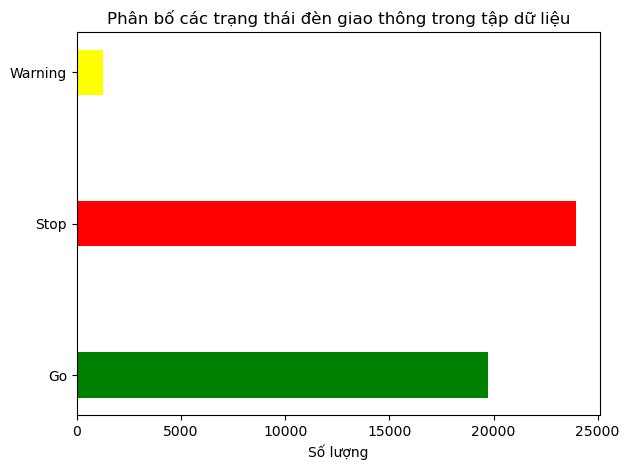

In [14]:
plotdata(go,stop,warning,'dữ liệu')

Number of image:  9040


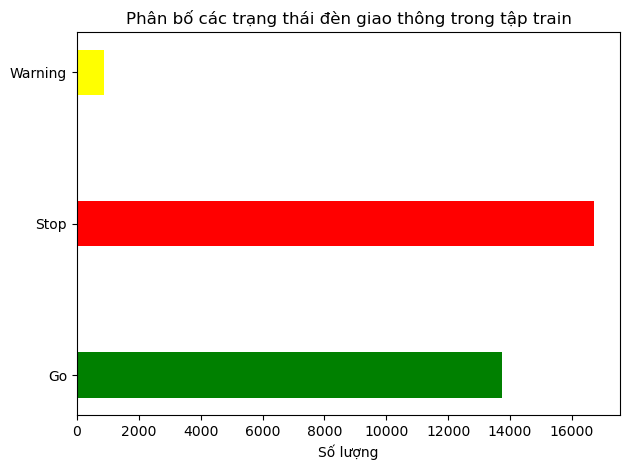

Number of image:  1305


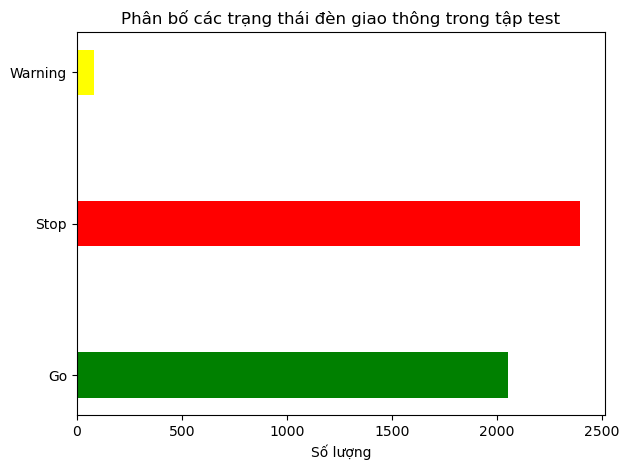

Number of image:  2605


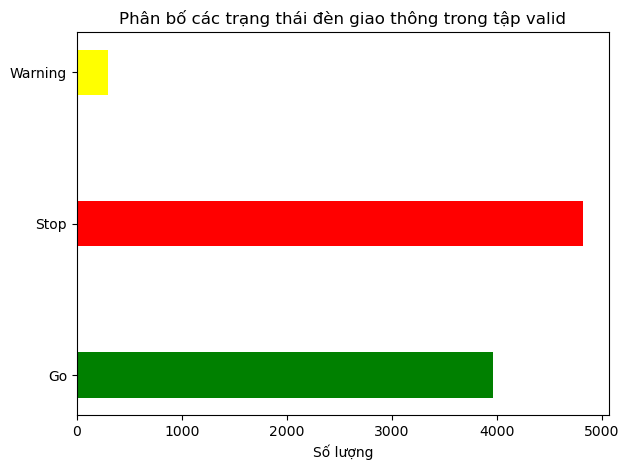

In [15]:
for x in ['train','test','valid']:
    go, stop, warning = thong_ke(f'{x}/labels') 
    plotdata(go, stop, warning,x)